<a href="https://colab.research.google.com/github/pablogarciasanchez/Automatic_Detection_of_Pneumonia_using_Deep_Learning/blob/main/Neumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision - FINAL PROJECT**

- ALUMNOS: José Antonio López Palenzuela y Pablo García Sánchez.
- MAILS: jalpalenzuela@correo.ugr.es y paablogarcia@correo.ugr.es.
- CURSO: 2022-2023.

# Detección Automática de Neumonía en Niños

# 1 . Motivación

> Según la OMS, la neumonía mata anualmente entorno a 2 millones de niños de menos de 5 años. Esto la convierte en una de las principales causas de mortalidad infantil a nivel global, acumulando más infantes fallecidos que el sarampión, la malaria y el VIH/SIDA combinados [1]. Como en el caso de muchas otras enfermedades, una evaluación temprana es de vital importancia.

> Pese a que un diagnóstico totalmente automatizado sigue sin estar regulado en la mayoría de países, desde hace años existen grandes esfuerzos a nivel internacional por desarrollar modelos basados en aprendizaje automático que, bajo la supervisión de los profesionales médicos, aceleren y aumenten la eficacia del diagnóstico clínico. En [2] pueden encontrarse artículos resultado de estos efuerzos: detección de cáncer [3], de lesiones gastrointestinales [3] o de lesiones mamográficas [5].

> Estos hechos motivaron la elección de la propuesta de este proyecto: implementar una red neuronal convolucional que detecte neumonía en niños a partir de una radiografía torácica.

# 2 . Base de Datos

> `PneumoniaMNIST` fue la base de datos utilizada.
- Procede de `MedMNIST` [6], una colección de bases datos de imágenes biomédicas con fines académicos.
- Está formada por 5.856 radiografías torácicas de niños. Cada radiografía corresponde a una imagen en escala de grises de 28x28 píxeles. Cada imagen puede pertenecer a un paciente con neumonía (clase positiva, etiquetada como 1) o a un paciente sin neumonía (clase negativa, etiquetada como 0).
- Se encuentra dividida en 3 subconjuntos: entramiento (4.708), validación (524) y test (624).

# 3 . Resultados Previos

> `MedMNIST` no sólo es un repositorio de bases de datos, si no también un "benchmark" para medir el rendimiento de un modelo entrenado con estos. Ofrece el rendimiento de algunos modelos basados en inteligencia artificial sobre el conjunto de test de cada una de las bases de datos. Dichos modelos son los siguientes: ResNet-18 [7], ResNet-50 [7], Auto-sklearn [8], AutoKeras [9] y Google AutoML Vision [10]. Los resultados para "PneumoniaMNIST" en términos de área bajo la curva ROC (AUC) y "accuracy" (ACC) de estos modelos son los siguientes:

<center>

|Modelo|ACC|AUC|
|-|-|-|
|ResNet-18 |0.854|0.944
|ResNet-50 |0.854|0.948
|auto-sklearn |0.855|0.942
|AutoKeras |0.878|0.947
|Google AutoML Vision |0.946|0.991

</center>

> Competir con el rendimiento de estos modelos fue uno de los objetivos parciales de este proyecto, especialmente con el de los dos primeros: arquitecturas ResNet entrenadas desde pesos aleatorios ("desde 0") durante 100 épocas, empleando el optimizador ADAM. Pueden consultarse los valores del resto de hiperparámetros de entrenamiento en [6]. Este par de modelos brindaron una oportunidad excelente para ilustrar otro de los objetivos principales de este proyecto: el uso "transfer learning" y "fine tuning".

# 4 . "Transfer Learning" y "Fine Tuning"

> La utilización de modelos pre-entrenados en alguna base de datos genérica o parecida a la utilizada es una técnica habitual para resolver problemas de clasificación de imágenes. Es aquí donde aparecen los conceptos "transfer learning" y el "fine tuning".

> El "transfer learning" o transferencia de conocimiento consiste en utilizar conocimiento adquirido en un problema para resolver otro. En el caso de redes neuronales, este conocimiento está encapsulado por los valores de los pesos de la red pre-entrenada. Si se entrena una red sobre un conjunto genérico y grande como ImageNet, el modelo aprenderá a extraer características con una alta probabilidad de ser generalizables y aplicables al problema que nos ocupa. Es por esto que, una red pre-entrenada en ImageNet, es una buena base sobre la que construir un modelo.

> El "fine tuning" o ajuste fino consiste en tomar esa red pre-entrenada (a la que se le ha añadido una cabecera para adaptarla a nuestro problema) y volver a entrenarla para que se ajuste aún más a nuestro problema. La razón de ser de esta técnica es que los pesos de las capas que se añaden al modelo pre-entrenado para adapatarlo al problema (cabecera) están inicializados con valores aleatorios, y su rendimiento puede mejorar mucho en unas pocas épocas. Normalmente este proceso de re-entrenamiento se divide en dos etapas: una primera en la que los pesos pre-entrenados se encuentran congelados (no se actualizan) y una segunda en la que se descongelan dichos pesos, se entrena la red al completo. De esta forma, los enormes errores que se generan y retropropagan en las primeras épocas (primera etapa), provocados por la aletoriedad inicial de los pesos de la cabecera, sólo afectan a dichos pesos, no influyen en aquellos pesos (pesos pre-entrenados) que tienen un valor más cercano a su óptimo y que no son responsables de la magnitud de estos errores.

# 5 . Objetivos

> Recapitulando todo lo expuesto y añadiendo los requisitos del enunciado del proyecto, los objetivos de éste fueron:
1. Implementar una red neuronal convolucional que determine si un niño tiene neumonía a partir de una radiografía torácica. Problema de clasificación binaria.
2. Construir dicha red a partir de una previamente entrenada con otro conjunto de datos. Utilizar "transfer learning" y "fine tuning".
3. Dicha red debe ofrecer el mejor rendimiento posible. Para ello se utilizaron los resultados de referencia ofrecidos por "MedMNIST".

# 6 . Metodología

### 6.1 Lectura de Datos

> Primero se descargó la base datos (archivo `pneumoniamnist.npz`). Los datos se descargan en el directorio asociado al entorno de ejecución del cuaderno. Se recomienda ejecutar el cuaderno desde `Colab` para un correcto funcionamiento. Consultar subsección 8.2 para más información.

> A continuación se almacenó la información codificada en `pneumoniamnist.npz` en una estructura de subdirectorios fácilmente legible para `fastai`. Nuevamente, consultar la subsección 8.2 para más información. Este paso es relevante ya que durante éste, las imágenes del conjunto de validación ofrecido por `MedMNIST` pasaron a ser parte del conjunto de entrenamiento. Esto fue porque se generó una partición entrenamiento-validación propia para validar los resultados de los clasificadores.

### 6.2 Preprocesado de Datos

> Tras visualizar la distribución de etiquetas del conjunto de entrenamiento, se observó que se trataba de un conjunto desbalanceado: 74.22% de casos positivos frente a 25.78% de casos negativos. Como suele ser beneficioso entrenar con un conjunto balanceado, se realizó un "undersampling" de la clase mayoritaria que resultó en una distribución de etiquetas totalmente balanceada: 50% de casos positivos y 50% de casos negativos. El precio a pagar fue el tamaño del conjunto de entrenamiento: de 5232 imágenes a 2698 imágenes. Es cierto que exiten técnicas más apropiadas para trabajar con conjuntos desbalanceados, técnicas que no implican sacrificar información: el "oversamplig" o "data augmentation" de la clase minoritaria o el uso funciones de pérdida que penalicen más los errores en la clase minoritaria (como "focal loss"). No obstante, los buenos resultados obtenidos avalan esta desacertada decisión.

> Antes de introducir cada imagen en el modelo, se re-escala a un tamaño de 224x224 y se transforma en una imagen de tres canales (RGB) para adapatarse a la arquitectura de los modelos utilizados. De 1x28x28 a 3x224x224.

> Respecto a la normalización, esta se efectúa a nivel de "batch". Consultar subsección 6.3.

### 6.2 Ajuste Fino

> Para encontrar el mejor modelo posible se realizó un ajuste fino de de 3 redes pre-entradas con ImageNet (más información a cerca del pre-entrenamiento en [11]): ResNet-18, ResNet-50 y AlexNet. Los detalles de la arquitectura de cada una pueden consultarse en su subsección "Modelo" correspondiente. La elección de las dos primeras arquitecturas fue para ilustrar la potencia del "transfer learning" y el "fine tuning" (recuérdese que el "MedMNIST" ofrece el rendimiento de una ResNet-18 y una ResNet-50 entrenadas desde pesos aleatorios, "desde 0"), la tercera fue por mera curiosidad.

> A continuación se muestran algunos aspectos comunes al ajuste fino de todos los modelos:
- 2 etapas. Una primera de 5 épocas con en la que sólo se entrena la cabecera de la red y una segunda de hasta 20 ("Early-Stopping" en base al valor de la función périda sobre el conjunto de valoración con tolerancia = 0.01 y paciencia = 5) en la que se entrena la red al completo.
- Función Pérdida: Entropía cruzada.
- Conjunto de Validación: Muestreo aleatorio sin reemplazo del 10% del conjunto de entrenamiento.
- Algoritmo de Optimización: ADAM. No se experimentó demasiado con sus hiperparámetros ya que ofrecía resultados más que aceptables en términos de rendimiento (ACC y AUC), convergencia y tiempo de ejecución para todos los modelos entrenados. Pueden consultarse la curvas de los ajustes en la sección 8.
  - Tasa de aprendizaje ($\lambda$): 0.001 para la primera etapa y 0.0001 para la segunda. No es arbitrario que sea más pequeña al entrenar todas las capas de la red que al entrenar sólo lás últimas capas completamente conectadas (cabecera) [12]. Al entrenar toda la red, se modifican los pesos pre-entrenados, que en general tienen ya un valor correcto, se reduce $\lambda$ para evitar que estos pesos se alejen demasiado de ese valor óptimo.
  - "Mini-Batches": Tamaño = 128. Mezclado aleatorio de su contenido a cada época (aletoriedad que favorece la regularización del modelo).
  - Resto de hiperparámetros de ADAM pueden consultarse en [13].
- Durante ambas etapas ajuste/entrenamiento se almacena el valor de los pesos del mejor modelo encontrado a cada época, para cargarlos al final del la etapa. Se consigue así que el sobreajuste no perjudique al modelo en términos de rendimiento, tan sólo en términos de tiempo de ejecución. Se define como mejor modelo, aquél con menor valor de la función pérdida en el conjunto de validación.

### 6.3 "Batch-Normalization"

> Se normalizaron los datos no sólo antes de introducirlos en la red (lo que supondría únicamente normalizar los datos de entrada de las neuronas de la primera capa) si no antes de alimentarlos al resto de capas. Generalmente, esta técnica se utiliza para acelerar el aprendizaje (en términos de épocas) o incluso mejorar resultados ya que evita pesos con valores muy grandes, que podrían dominar sobre el resto por una cuestión de escala.

### 6.4 "Dropout"

> En el caso de las redes ResNet, se probaron dos versiones de cada una: una con "dropout" en la primera capa completamente conectada de la cabecera y otra sin él.

> Recuérdese que "dropout" es una técnica que consiste en desactivar ciertas neuronas de una capa durante el entrenamiento. Las neuronas desactivadas varían aleatoriamente con cada "mini-batch" procesado. Esta técnica favorece la regularización del modelo, ya que permite obligar a las neuronas a desacoplarse. Como sugiere la bibliografía recomendada, se utilizó un $p=0.5$ como valor para la probabilidad de que una neurona se "apague" a cada "mini-batch" procesado.

### 6.5 Validación

> Existen muchas fuentes que introducen aletoriedad en el entrenamiento y evaluación de un modelo: partición entrenamiento-validación, contenido de los "batches" a cada época, secuencia de nueronas que se apagan a cada "batch" al aplicar "dropout" ... Estas pueden derivar en secuencias pseudoaletorias especialmente favorables o perjudiciales que hagan mal interpretar los resultados de un clasificador.

> Una solución rigurosa a este problema es la validación cruzada pero como `fastai` no ofrece una fácil integración de este método con su API, se optó por una técnica bastante menos robusta a escenarios aleatorios especialmente perjudiciales o beneficiosos: "hold-out". Se generó una única partición (estratificada) entrenamiento-validación y se utilizaron los resultados sobre ese conjunto de validación para valorar los modelos.

### 6.6 Métricas de Rendimiento

> Las métricas de rendimiento a calcular para cada modelo durante el proceso de validación fueron la "accuracy" (ACC) y el area bajo la curva ROC (AUC). Se escogieron porque son las métricas que se utilizan en el "benchmark" del que procede la base de datos (`MedMNIST`). En caso de conflicto (el modelo con mejor ACC no sea el modelo con mejor AUC) prima la ACC.

### 6.7 Test

> El modelo con mejor ACC y AUC sobre el conjunto de validación se consideró como el mejor modelo implementado y en consecuencia, se evaluó sobre el conjunto de test para competir con los resultados del "benchmark". Recuérdese que no puede utilzarse el conjunto de test para escoger el mejor modelo ("data snooping").

# 7 . Conclusiones

## 7.1 Mejor Modelo - AlexNet

> De acuerdo con el criterio de validación establecido ("hold-out"), el mejor modelo encontrado fue AlexNet, ya que presenta un mayor valor para ACC y AUC en el conjunto de validación que el resto.

<center>

Modelo | $\#E$ | $E_i$ | ACC | AUC
-|-|-|-|-|
Resnet18 | 14 | 9 | 0.947955 | 	0.991467
ResNet18 + Dropout |13 | 8 | 0.925651 | 0.987312
ResNet50 | 14 | 9 |	0.951673 | 0.989860
ResNet50 + Dropout | 13 | 8 |	0.933086 | 0.987201
AlexNet | 20 | 15 |	0.959108 | 0.993240

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.

> Dado que se trata del mejor modelo encontrado, se evaluó sobre el conjunto de test y se comparó con los resultados del "benchmark" `MedMNIST`. No sólo compite si no que se sitúa en segunda posición para ambas métricas, un resultado bastante prometedor que se ha conseguido en mucho menos tiempo que el resto (20 épocas de 6 segundos cada una) y con un coste computacional mucho más bajo (si no se considera el pre-entrenamiento). Todo gracias al "transfer learning" y el "fine tuning".


<center>

|Modelo|ACC|AUC|
|-|-|-|
|ResNet-18 |0.854|0.944
|ResNet-50 |0.854|0.948
|auto-sklearn |0.855|0.942
|AutoKeras |0.878|0.947
|AlexNet + ImageNet | 0.893 | 0.968 |
|Google AutoML Vision |0.946|0.991

</center>

## 7.2 ResNets

> También se ejecutaron los modelos ResNet implementados sobre el conjunto de test, no para orientar decisiones de implementación o declararlos como el mejor modelo (como ya se ha comentado, si se hace esto se estaría cometiendo "data snooping") si no para ilustrar aún más la utilidad del "transfer learning" y el "fine tuning" al compararlos con exactamente la misma red entrenada a partir de pesos aleatorios (desde 0).

<center>

|Modelo|ACC|AUC|# Épocas de entrenamiento
|-|-|-|-|
|ResNet-18 (benchmark)|0.8540|0.9440| 100
ResNet18 + ImageNet | 0.8942 | 0.9614 | 14
ResNet18 + ImageNet + Dropout | 0.9022 | 0.9624 | 13


<center>

|Modelo|ACC|AUC|# Épocas de entrenamiento
|-|-|-|-|
|ResNet-50 (benchmark) |0.854|0.948| 100
ResNet50 + ImageNet | 0.8654 | 0.9286 | 13
ResNet50 + ImageNet + Dropout | 0.8814 | 0.9366 | 14

> Como puede observarse, para una misma red resnet18 o resnet50 (las variantes con "dropout" sólo varían en una capa de "dropout" con p=0.5 sobre la última capa oculta de la red), se obtienen mejores ACC y AUC pre-entrenando con ImageNet y haciendo un ajuste fino con el conjunto de entrenamiento reducido ("undersampleado") durante 14 épocas que entrenando "desde 0" con todo el conjunto de entrenamieno durante 100 épocas. Recuérdese que todos los modelos utilizan el mismo optimizador (ADAM), con los mismos hiperparámetros a excepción de la tasa de entrenamiento, lo que implica que esta diferencia no es a causa de utilizar un optimizador distinto.

> También puede observarse que pese a no ser los mejores modelos en la fase de validación, existen un par de modelos (ResNet18 y ResNet18 + dropout) con mejor ACC sobre el conjunto de test que el mejor modelo en validación (AlexNet). Esto puede ser resultado de utilizar una técnica de validación ("hold out") tan poco riguroso (respecto a otras como validación cruzada).

## 7.3 Posibles Mejoras

- La forma de gestionar el desbalanceo de los datos no fue la más óptima. El "undersampling" de la clase mayoritaria hizo que se sacrificasen muchos datos, 2534 imágenes de casos positivos de 5232 que se tenían en el conjunto de entrenamiento, un 48.43%. Como ya se ha comentado existen técnicas que no implican la pérdida de información útil: el "oversamplig" o "data augmentation" de la clase minoritaria o el uso funciones de pérdida como "focal loss". Sin embargo, como ya se ha dicho, los buenos resultados obtenidos (en términos métricas de rendimiento) avalaron esta desacertada decisión.

- Un método de validación más riguroso, ya sea validación cruzada o repetir los experimentos para varias particiones entrenamiento-test, garantizaría una mayor confianza en los resultados obtenidos en la fase de validación. Difícilmente el mejor modelo en validación no sería el mejor modelo sobre el conjunto de test utilizando alguna de estas técnicas, algo que ocurre utilizando "hold-out". Recuérdese que los dos modelos ResNet18 implementados tienen una ACC mayor que la de AlexNet para el conjunto de test teniendo un peor resultado en el conjunto de validación.

# 8 . Resultados Experimentales

> Para reproducir los resultados de un modelo, es necesario ejecutar todas las celdas respetivas a su subsección.

## 8.1 Herramientas Software

> Instalación de la API de medMNIST.

In [ ]:
!pip install medmnist
import medmnist
from medmnist import INFO, Evaluator
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=e07ad7306c960b91214511701f28df349f8fedd741715a35e95819b661d0f1c8
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire
MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


> Instalación de `fastai`.

In [ ]:
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from fastai.vision.all import *
import copy

# Function to display evaluation metrics
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

def plot_metrics_vis(metrics, names, nrows=None, ncols=None, figsize=None, **kwargs):
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

fastcore version 1.5.27 installed
fastai version 2.7.10 installed


## 8.2 Lectura de Datos

> Enlace de descarga (y otra información adicional) de la BBDD.

In [ ]:
# Identificador de la BD en MNIST
data_flag = 'pneumoniamnist'
# Información sobre la BBDD
info = INFO[data_flag]
info

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/record/6496656/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'task': 'binary-class',
 'label': {'0': 'normal', '1': 'pneumonia'},
 'n_channels': 1,
 'n_samples': {'train': 4708, 'val': 524, 'test': 624},
 'license': 'CC BY 4.0'}

> Descarga de la BBDD en formato `.npz`. Este tipo de archivo permite acceder a la información almacenada a través de claves (como si tratase de un diccionario). `pneumoniamnist.npz` contiene el conjunto de entrenamiento, validación y test utilizado en el benchmark. Se mezclaron entrenamiento y validación en un mismo conjunto.

In [ ]:
# Descarga de la BD
from torchvision.datasets.utils import download_url
# Ruta del directorio donde se descagan el fichero de datos
path_dir_descarga='./'
download_url(url = info['url'],
             root = path_dir_descarga,
             filename = data_flag + ".npz",
             md5 = info["MD5"])

  0%|          | 0/4170669 [00:00<?, ?it/s]

> Se almacenó el contenido del fichero de datos `.npz` en un sistema de archivos (estructura de directorios y subdirectorios) que facilita el uso de las funcionalidades de `fastai`. Cada imagen se almacenó en el directorio correspondiente al conjunto al que pertencen (entrenamiento o test) y a su etiqueta (0 o 1). Mientras sea distinto el de los imágenes/ficheros es irrelevante.

```
                 ...
                  |
                 data
               /      \
             /          \
         train          test
        /     \        /    \
       0       1      0      1
       |       |      |      |
      ...     ...    ...    ...

```


> De esta forma, a la hora de construir las estructuras de datos con los que trabaja un modelo en `fastai` (`DataLoaders` y `DataBlocks`) puede delegarse en la función `get_images_files()` y `parent_label` en el constructor de los `DataBlocks`.

In [ ]:
import sys
from PIL import Image

# Se descarga la BD. La API la ofrece en formato .npz (numpy)
npz_file = np.load(path_dir_descarga + data_flag + ".npz")

# Se adapta el contenido del fichero .npz a "fastai": get_images_files + parent_label
#                 ...
#                  |
#                 data
#               /      \
#             /          \
#         train          test
#        /     \        /    \
#       0       1      0      1
#       |       |      |      |
#      ...     ...    ...    ...
#

# Directorio general para almacenar datos de entrenamiento y test
path_dir_datos = './data/'
os.mkdir(path_dir_datos)

# ENTRENAMIENTO
# Sub-directorio con imágenes de entrenamiento
os.mkdir(path_dir_datos + 'train/')
# Sub-sub-directorios para cada clase
label_names = np.unique(npz_file['train_labels'])
for l in label_names:
  os.mkdir(path_dir_datos + 'train/' + str(l))
# Guardado de imágenes en su directorio correspondiente (el de su etiqueta)
i=0
for train_image, train_label in zip(npz_file['train_images'], npz_file['train_labels']):
  im = Image.fromarray(train_image)
  im.save(fp = path_dir_datos + 'train/' + str(train_label[0]) + '/' + str(i) + '.jpeg')
  i = i+1
# Se utiliza una técnica de validación distinta a la de la bibliografía, luego también se incluyen las del conjunto de validación
for train_image, train_label in zip(npz_file['val_images'], npz_file['val_labels']):
  im = Image.fromarray(train_image)
  im.save(fp = path_dir_datos + 'train/' + str(train_label[0]) + '/' + str(i) + '.jpeg')
  i = i+1

# TEST
# Sub-directorio con imágenes de test
os.mkdir(path_dir_datos + 'test/')
# Sub-sub-directorios para cada clase
for l in label_names:
  os.mkdir(path_dir_datos + 'test/' + str(l))
# Guardado de imágenes en su directorio correspondiente
i=0
for train_image, train_label in zip(npz_file['test_images'], npz_file['test_labels']):
  im = Image.fromarray(train_image)
  im.save(fp = path_dir_datos + 'test/' + str(train_label[0]) + '/' + str(i) + '.jpeg')
  i = i+1

> Comprobación para lectura con `fastai`.

In [ ]:
# TRAIN
files_train = get_image_files(path_dir_datos + '/train')
files_train_pos = get_image_files(path_dir_datos + '/train/1')
files_train_neg = get_image_files(path_dir_datos + '/train/0')
print('- Total de imágenes de entrenamiento: ', len(files_train))
print("\t- Positivos = {} = {}".format(len(files_train_pos), np.round(len(files_train_pos)/len(files_train), 4)))
print("\t- Negativos = {} = {}".format(len(files_train_neg), np.round(len(files_train_neg)/len(files_train), 4)))

# TEST
files_test = get_image_files(path_dir_datos + '/test')
print('- Total de imágenes de test: ', len(files_test))

# TOTAL
print('- Total de imágenes: ', len(files_train) + len(files_test))

- Total de imágenes de entrenamiento:  5232
	- Positivos = 3883 = 0.7422
	- Negativos = 1349 = 0.2578
- Total de imágenes de test:  624
- Total de imágenes:  5856


## 8.3 Preprocesado

> Undersampling de la clase positiva.

In [ ]:
# Reproducibilidad
np.random.seed(1234)
# Undersampling de la clase positiva
for caso in files_train_pos[np.random.permutation(np.arange(0,len(files_train_pos)))[:(len(files_train_pos)-len(files_train_neg))]]:
  os.remove(caso)

In [ ]:
# TRAIN
files_train = get_image_files(path_dir_datos + '/train')
files_train_pos = get_image_files(path_dir_datos + '/train/1')
files_train_neg = get_image_files(path_dir_datos + '/train/0')
print('- Total de imágenes de entrenamiento: ', len(files_train))
print("\t- Positivos = {} = {}".format(len(files_train_pos), np.round(len(files_train_pos)/len(files_train), 4)))
print("\t- Negativos = {} = {}".format(len(files_train_neg), np.round(len(files_train_neg)/len(files_train), 4)))
# TEST
files_test = get_image_files(path_dir_datos + '/test')
print('- Total de imágenes de test: ', len(files_test))

# TOTAL
print('- Total de imágenes: ', len(files_train) + len(files_test))

- Total de imágenes de entrenamiento:  2698
	- Positivos = 1349 = 0.5
	- Negativos = 1349 = 0.5
- Total de imágenes de test:  624
- Total de imágenes:  3322


## 8.4 ResNet18

### Reproducibilidad

> Necesario fijado de semillas antes de su construcción para garantizar la reproducibilidad de los resultados.

In [ ]:
# Reproducibilidad
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available(): torch.cuda.manual_seed_all(1234)

### DataLoader

> Construcción del datablock.

In [ ]:
# DataLoader de entrenamiento
train_dataloader = DataBlock(
      blocks = (ImageBlock, CategoryBlock), # Tipo de input (imagen) y output (etiqueta categórica)
      get_items = get_image_files, # Devuelve una lista con todas las imagenes almacenadas en un directorio (y sus subdirectorios)
      splitter = RandomSplitter(valid_pct=0.1, seed=1234), # Reserva un 10% para validación (estratificado)
      get_y = parent_label, # Etiquetas definidas por el directorio en el que se encuentran ubicadas las imágenes (padre)
      item_tfms = Resize(224), # Se re-escalan las imágenes a 224, método de interpolación PIL.nearest
      batch_tfms = [IntToFloatTensor(), Normalize.from_stats(mean=[.5], std=[.5])], # Normalización de valores
    ).dataloaders(
        path_dir_datos + "/train", # Ruta de los datos
        seed=1234,
        bs=128, # "Batches" aleatorios a cada época
        shuffle = True # Tamaño de batch
        )

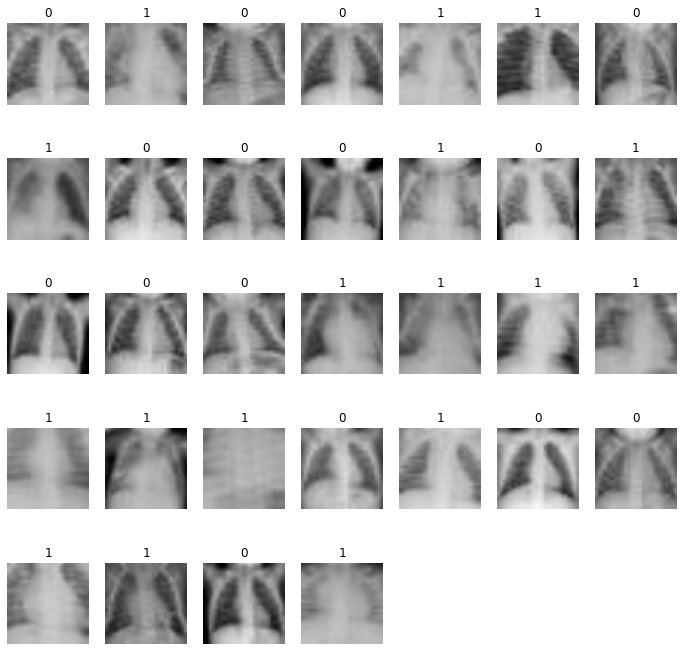

In [ ]:
# Comprobación dataloader
train_dataloader.show_batch(max_n=32, figsize=(12,12))

In [ ]:
# Comprobación dataloader
train_dataloader.train.show

<bound method Datasets.show of (#2429) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

In [ ]:
# Comprobación dataloader
train_dataloader.valid.show

<bound method Datasets.show of (#269) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]>

### Modelo

In [ ]:
# Cabecera
custom_head_resnet18_ = nn.Sequential(
    nn.Flatten(),
    nn.Linear(25088,2)
    )

# Resto del modelo
learn_resnet18_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet18,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet18_
    )

# Visulaizar modelo
learn_resnet18_.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                     

### Ajuste Fino

epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,2.415428,4.533517,0.875111,0.550186,1.000000,0.538168,0.449814,00:08
1,1.290881,3.855580,0.897135,0.609665,1.000000,0.573171,0.390335,00:06
2,0.809134,1.444503,0.961602,0.780669,0.992908,0.707071,0.219331,00:06
3,0.537053,0.451284,0.965703,0.918216,0.921986,0.921986,0.081784,00:07
4,0.360098,0.518704,0.976895,0.888476,0.971631,0.840491,0.111524,00:07


Better model found at epoch 0 with valid_loss value: 4.533516883850098.
Better model found at epoch 1 with valid_loss value: 3.8555798530578613.
Better model found at epoch 2 with valid_loss value: 1.4445033073425293.
Better model found at epoch 3 with valid_loss value: 0.4512837529182434.


epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.328281,0.704396,0.969664,0.895911,0.971631,0.850932,0.104089,00:11
1,0.196005,0.467662,0.981549,0.944238,0.936170,0.956522,0.055762,00:10
2,0.126426,0.310766,0.989195,0.936803,0.936170,0.942857,0.063197,00:11
3,0.078748,0.260665,0.991467,0.947955,0.943262,0.956835,0.052045,00:10
4,0.052777,0.430623,0.989971,0.936803,0.900709,0.976923,0.063197,00:10
5,0.036413,0.301204,0.990747,0.951673,0.950355,0.957143,0.048327,00:10
6,0.026430,0.315487,0.990913,0.951673,0.950355,0.957143,0.048327,00:10
7,0.018347,0.394475,0.992797,0.947955,0.921986,0.977444,0.052045,00:11
8,0.012821,0.290215,0.992354,0.947955,0.950355,0.950355,0.052045,00:11


Better model found at epoch 0 with valid_loss value: 0.7043964266777039.
Better model found at epoch 1 with valid_loss value: 0.4676622748374939.
Better model found at epoch 2 with valid_loss value: 0.31076565384864807.
Better model found at epoch 3 with valid_loss value: 0.2606652081012726.
No improvement since epoch 3: early stopping


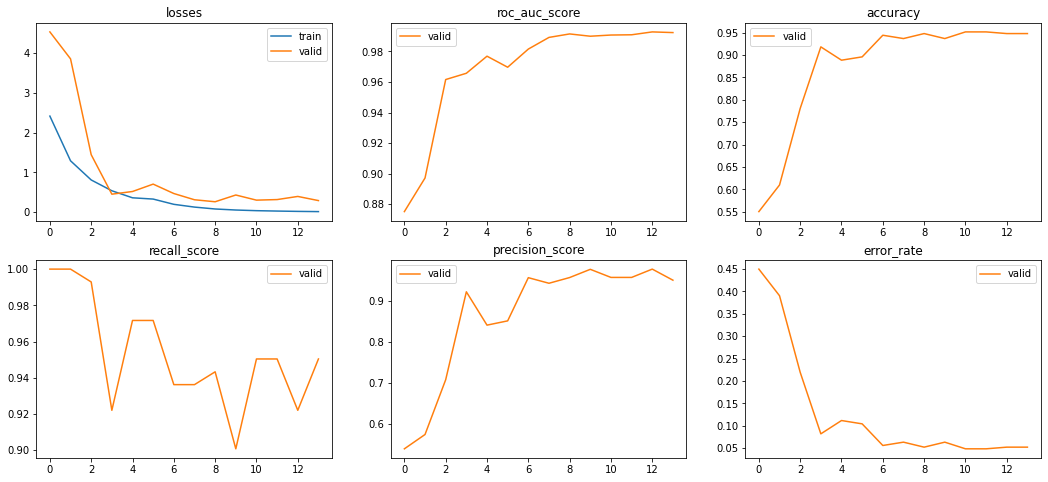

In [ ]:
# Ajuste fino MANUAL
lr = 0.001
tol = 0.01
patience = 5

learn_resnet18_ = vision_learner(
  dls = train_dataloader,
  arch = fastai.vision.models.resnet18,
  metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
  pretrained=True,
  train_bn=False,
  custom_head=custom_head_resnet18_
  )


# Entrenamiento de la cabecera
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      )
    ]
# Congelar pesos
learn_resnet18_.freeze()
# Entrenar cabecera
learn_resnet18_.fit(n_epoch=5, lr=lr, cbs=cbs)
# Almacenar resultados
metrics = np.stack(learn_resnet18_.recorder.values)

# Entrenamiento de toda la red
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      ),
    EarlyStoppingCallback(
        monitor='valid_loss',
        min_delta=tol,
        patience=patience)
    ]
learn_resnet18_.unfreeze()
learn_resnet18_.fit(n_epoch=20, lr=lr/10, cbs=cbs)
# Almacenar resultados
metrics = np.vstack([metrics, learn_resnet18_.recorder.values])
names = learn_resnet18_.recorder.metric_names[1:-1]
# Gráficas
plot_metrics_vis(metrics=metrics, names=names)

### Resultados Validación

> - El mejor modelo (menor $L_{val}$) se encuentra para la época 3 de la segunda etapa del ajuste fino; es decir, novena época a nivel global.

<center>

Modelo | $\#E$ | $E_i$ | $L_{train}$ | $L_{val}$ | ACC | AUC
-|-|-|-|-|-|-
Resnet18| 14 | 9 | 0.078748 | 0.260665 | 0.947955 | 	0.991467

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.
- $L_{train}$: Entropía cruzada media del conjunto de entranamiento.
- $L_{val}$: Entropía cruzada media del conjunto de validación.
- $ACC$: "Accuracy" para el conjunto de validación.
- $AUC$. Area bajo la curva ROC para el conjunto de validación.

### Test

In [ ]:
# DataLoader de test
test_dataloader = learn_resnet18_.dls.test_dl(files_test, with_labels=True)
# Comprobación
test_dataloader.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

Métricas de test:
	- accuracy =  0.8942
		- precision =  0.9872
		- recall =  0.8632
	- AUC =  0.9614



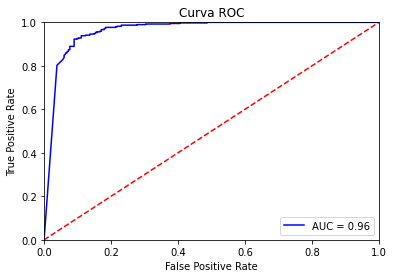

In [ ]:
# Predicción
import sklearn.metrics as metrics
preds, targs = learn_resnet18_.get_preds(dl=test_dataloader)

# Métricas de rendimiento

# De vector de probabilidades a etiqueta
preds_labels = []
for p in preds:
  if p[0] > p[1]:
    preds_labels.append(0)
  else:
    preds_labels.append(1)

# ACC, precision y recall
acc = metrics.accuracy_score(preds_labels, targs)
precision = metrics.precision_score(preds_labels, targs)
recall = metrics.recall_score(preds_labels, targs)
fpr, tpr, threshold = metrics.roc_curve(targs, preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('Métricas de test:')
print('\t- accuracy = ', round(float(acc), 4))
print('\t\t- precision = ', round(float(precision), 4))
print('\t\t- recall = ', round(float(recall), 4))
print('\t- AUC = ', round(float(roc_auc), 4))
print('')
# AUC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<center>

Modelo | ACC | AUC
-|-|-|
ResNet18 + ImageNet | 0.8942 | 0.9614 |

</center>

## 8.5 ResNet18 + Dropout

### Reproducibilidad

> Necesario fijado de semillas antes de su construcción para garantizar la reproducibilidad de los resultados.

In [ ]:
# Reproducibilidad
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available(): torch.cuda.manual_seed_all(1234)

### DataLoader

> Construcción del datablock.

In [ ]:
# DataBlock
train_dataloader = DataBlock(
      blocks = (ImageBlock, CategoryBlock), # Tipo de input (imagen) y output (etiqueta categórica)
      get_items = get_image_files, # Devuelve una lista con todas las imagenes almacenadas en un directorio (y sus subdirectorios)
      splitter = RandomSplitter(valid_pct=0.1, seed=1234), # Reserva un 10% para validación (estratificado)
      get_y = parent_label, # Etiquetas definidas por el directorio en el que se encuentran ubicadas las imágenes (padre)
      item_tfms = Resize(224), # Se re-escalan las imágenes a 224, método de interpolación PIL.nearest
      batch_tfms = [IntToFloatTensor(), Normalize.from_stats(mean=[.5], std=[.5])], # Normalización de valores
    ).dataloaders(
        path_dir_datos + "/train", # Ruta de los datos
        seed=1234,
        bs=128, # "Batches" aleatorios a cada época
        shuffle = True # Tamaño de batch
        )

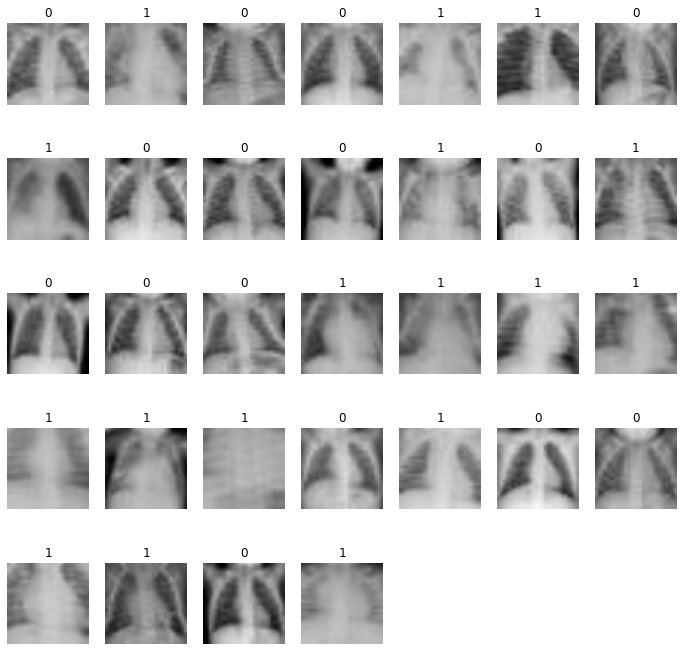

In [ ]:
# Comprobación dataloader
train_dataloader.show_batch(max_n=32, figsize=(12,12))

In [ ]:
# Comprobación dataloader
train_dataloader.train.show

<bound method Datasets.show of (#2429) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

In [ ]:
# Comprobación dataloader
train_dataloader.valid.show

<bound method Datasets.show of (#269) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]>

### Modelo

In [ ]:
# Cabecera
custom_head_resnet18_ = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(p=0.5),
    nn.Linear(25088,2)
    )

# Resto del modelo
learn_resnet18_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet18,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet18_
    )

# Visulaizar modelo
learn_resnet18_.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                     

### Ajuste Fino

epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,2.472650,4.202974,0.870290,0.557621,1.000000,0.542308,0.442379,00:11
1,1.372448,2.929413,0.917442,0.657993,0.992908,0.606061,0.342007,00:10
2,0.894220,1.394183,0.966340,0.802974,0.992908,0.729167,0.197026,00:10
3,0.626638,0.475736,0.967226,0.921933,0.907801,0.941176,0.078067,00:06
4,0.448263,0.452471,0.977006,0.914498,0.957447,0.888158,0.085502,00:07


Better model found at epoch 0 with valid_loss value: 4.20297384262085.
Better model found at epoch 1 with valid_loss value: 2.929412603378296.
Better model found at epoch 2 with valid_loss value: 1.3941832780838013.
Better model found at epoch 3 with valid_loss value: 0.4757360517978668.
Better model found at epoch 4 with valid_loss value: 0.45247092843055725.


epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.311985,0.454937,0.982048,0.921933,0.893617,0.954545,0.078067,00:09
1,0.191091,0.472380,0.986370,0.944238,0.929078,0.963235,0.055762,00:09
2,0.122946,0.435121,0.987312,0.925651,0.929078,0.929078,0.074349,00:10
3,0.082977,0.503106,0.987478,0.936803,0.886525,0.992063,0.063197,00:10
4,0.076897,0.543103,0.985982,0.936803,0.900709,0.976923,0.063197,00:10
5,0.058944,0.562796,0.989583,0.944238,0.893617,1.000000,0.055762,00:10
6,0.048207,0.522074,0.985317,0.944238,0.929078,0.963235,0.055762,00:12
7,0.034718,0.589208,0.984209,0.951673,0.936170,0.970588,0.048327,00:10


Better model found at epoch 0 with valid_loss value: 0.4549373388290405.
Better model found at epoch 2 with valid_loss value: 0.4351213872432709.
No improvement since epoch 2: early stopping


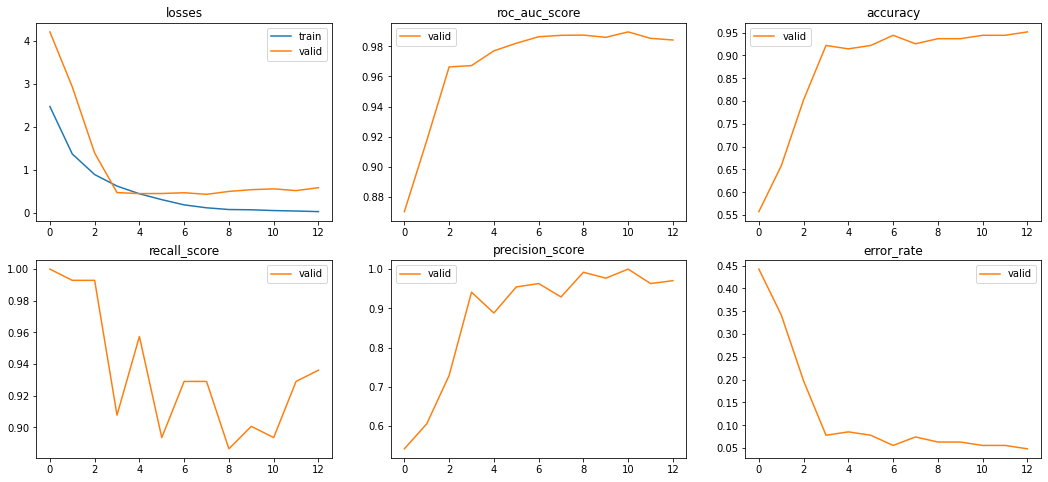

In [ ]:
# Ajuste fino MANUAL
lr = 0.001
tol = 0.01
patience = 5

learn_resnet18_ = vision_learner(
  dls = train_dataloader,
  arch = fastai.vision.models.resnet18,
  metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
  pretrained=True,
  train_bn=False,
  custom_head=custom_head_resnet18_
  )


# Entrenamiento de la cabecera
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      )
    ]
# Congelar pesos
learn_resnet18_.freeze()
# Entrenar cabecera
learn_resnet18_.fit(n_epoch=5, lr=lr, cbs=cbs)
# Almacenar resultados
metrics = np.stack(learn_resnet18_.recorder.values)

# Entrenamiento de toda la red
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      ),
    EarlyStoppingCallback(
        monitor='valid_loss',
        min_delta=tol,
        patience=patience)
    ]
learn_resnet18_.unfreeze()
learn_resnet18_.fit(n_epoch=20, lr=lr/10, cbs=cbs)
# Almacenar resultados
metrics = np.vstack([metrics, learn_resnet18_.recorder.values])
names = learn_resnet18_.recorder.metric_names[1:-1]
# Gráficas
plot_metrics_vis(metrics=metrics, names=names)

### Resultados Validación

> - El mejor modelo (menor $L_{val}$) se encuentra para la época 2 de la segunda etapa del ajuste fino; es decir, octava época a nivel global.


<center>

Modelo |$\#E$ | $E_i$ | $L_{train}$ | $L_{val}$ | ACC | AUC
-|-|-|-|-|-|-
ResNet18 + Dropout |13 | 8 | 0.122946 | 0.435121 | 0.925651 | 0.987312

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.
- $L_{train}$: Entropía cruzada media del conjunto de entranamiento.
- $L_{val}$: Entropía cruzada media del conjunto de validación.
- $ACC$: "Accuracy" para el conjunto de validación.
- $AUC$. Area bajo la curva ROC para el conjunto de validación.

### Test

In [ ]:
# DataLoader de test
test_dataloader = learn_resnet18_.dls.test_dl(files_test, with_labels=True)
# Comprobación
test_dataloader.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

Métricas de test:
	- accuracy =  0.9022
		- precision =  0.9846
		- recall =  0.8747
	- AUC =  0.9624



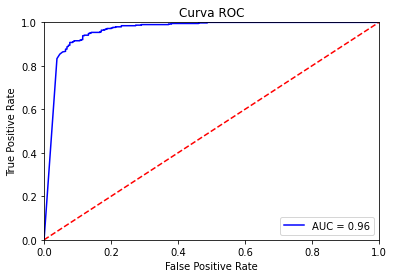

In [ ]:
# Predicción
import sklearn.metrics as metrics
preds, targs = learn_resnet18_.get_preds(dl=test_dataloader)

# Métricas de rendimiento

# De vector de probabilidades a etiqueta
preds_labels = []
for p in preds:
  if p[0] > p[1]:
    preds_labels.append(0)
  else:
    preds_labels.append(1)

# ACC, precision y recall
acc = metrics.accuracy_score(preds_labels, targs)
precision = metrics.precision_score(preds_labels, targs)
recall = metrics.recall_score(preds_labels, targs)
fpr, tpr, threshold = metrics.roc_curve(targs, preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('Métricas de test:')
print('\t- accuracy = ', round(float(acc), 4))
print('\t\t- precision = ', round(float(precision), 4))
print('\t\t- recall = ', round(float(recall), 4))
print('\t- AUC = ', round(float(roc_auc), 4))
print('')
# AUC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<center>

Modelo | ACC | AUC
-|-|-|
ResNet18 + ImageNet + Dropout | 0.9022 | 0.9624 |

</center>

## 8.6 ResNet50

### Reproducibilidad

> Necesario fijado de semillas antes de su construcción para garantizar la reproducibilidad de los resultados.

In [ ]:
# Reproducibilidad
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available(): torch.cuda.manual_seed_all(1234)

### DataLoader

> Construcción del datablock.

In [ ]:
# DataLoader de entrenamiento
train_dataloader = DataBlock(
      blocks = (ImageBlock, CategoryBlock), # Tipo de input (imagen) y output (etiqueta categórica)
      get_items = get_image_files, # Devuelve una lista con todas las imagenes almacenadas en un directorio (y sus subdirectorios)
      splitter = RandomSplitter(valid_pct=0.1, seed=1234), # Reserva un 10% para validación (estratificado)
      get_y = parent_label, # Etiquetas definidas por el directorio en el que se encuentran ubicadas las imágenes (padre)
      item_tfms = Resize(224), # Se re-escalan las imágenes a 224, método de interpolación PIL.nearest
      batch_tfms = [IntToFloatTensor(), Normalize.from_stats(mean=[.5], std=[.5])], # Normalización de valores
    ).dataloaders(
        path_dir_datos + "/train", # Ruta de los datos
        seed=1234,
        bs=128, # "Batches" aleatorios a cada época
        shuffle = True # Tamaño de batch
        )

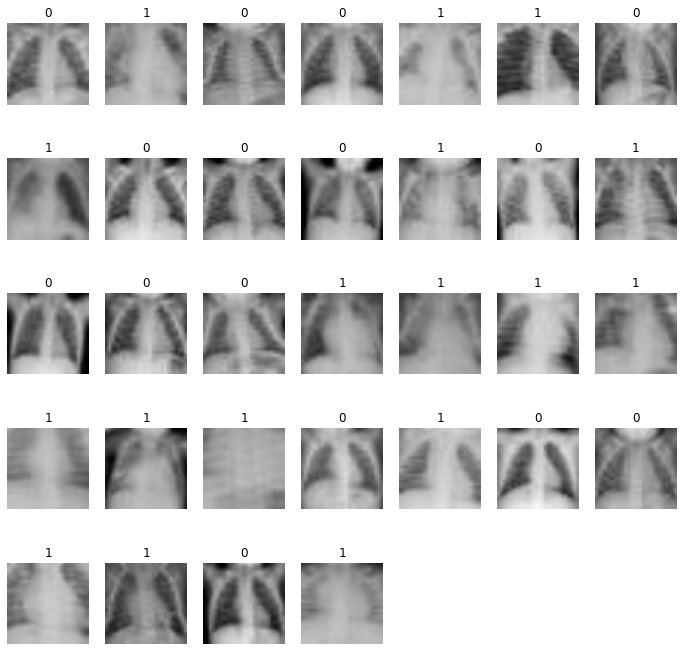

In [ ]:
# Comprobación dataloader
train_dataloader.show_batch(max_n=32, figsize=(12,12))

In [ ]:
# Comprobación dataloader
train_dataloader.train.show

<bound method Datasets.show of (#2429) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

In [ ]:
# Comprobación dataloader
train_dataloader.valid.show

<bound method Datasets.show of (#269) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]>

### Modelo

In [ ]:
# Cabecera
custom_head_resnet50_ = nn.Sequential(
    nn.Flatten(),
    nn.Linear(100352 ,2)
    )

# Resto del modelo
learn_resnet50_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet50,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet50_
    )

# Visulaizar modelo
learn_resnet50_.summary()

Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                       

### Ajuste Fino

epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,3.548074,2.471937,0.880375,0.706320,0.978723,0.644860,0.293680,00:09
1,2.215225,10.286191,0.698166,0.550186,1.000000,0.538168,0.449814,00:09
2,1.487808,4.130588,0.872368,0.706320,0.992908,0.642202,0.293680,00:10
3,0.994222,2.809004,0.910350,0.780669,0.992908,0.707071,0.219331,00:10
4,0.669976,0.628622,0.973460,0.910781,0.936170,0.897959,0.089219,00:09


Better model found at epoch 0 with valid_loss value: 2.4719367027282715.
Better model found at epoch 4 with valid_loss value: 0.6286215782165527.


epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.418407,0.780249,0.967476,0.921933,0.950355,0.905405,0.078067,00:27
1,0.293472,0.642325,0.975177,0.925651,0.950355,0.911565,0.074349,00:28
2,0.205575,0.799440,0.973016,0.921933,0.971631,0.889610,0.078067,00:27
3,0.144940,0.400098,0.989860,0.951673,0.971631,0.938356,0.048327,00:28
4,0.098460,0.611845,0.985040,0.940520,0.964539,0.925170,0.059480,00:28
5,0.073142,0.581692,0.982048,0.940520,0.964539,0.925170,0.059480,00:27
6,0.052214,0.502456,0.988337,0.936803,0.964539,0.918919,0.063197,00:28
7,0.036497,0.550082,0.987893,0.947955,0.929078,0.970370,0.052045,00:27
8,0.025774,0.680801,0.976285,0.936803,0.964539,0.918919,0.063197,00:27


Better model found at epoch 0 with valid_loss value: 0.7802492380142212.
Better model found at epoch 1 with valid_loss value: 0.6423253417015076.
Better model found at epoch 3 with valid_loss value: 0.4000980257987976.
No improvement since epoch 3: early stopping


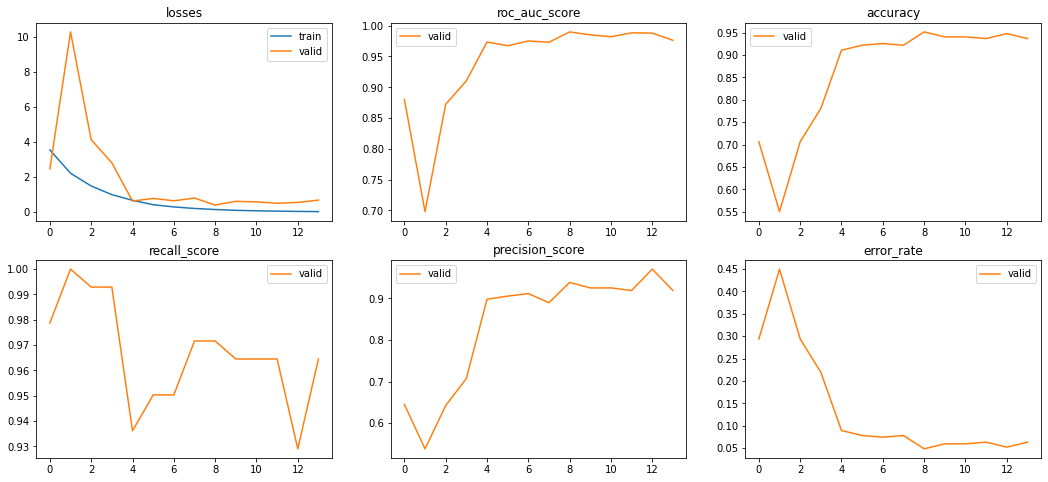

In [ ]:
# Ajuste fino MANUAL
lr = 0.001
tol = 0.01
patience = 5

learn_resnet50_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet50,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet50_
    )


# Entrenamiento de la cabecera
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      )
    ]
# Congelar pesos
learn_resnet50_.freeze()
# Entrenar cabecera
learn_resnet50_.fit(n_epoch=5, lr=lr, cbs=cbs)
# Almacenar resultados
metrics = np.stack(learn_resnet50_.recorder.values)

# Entrenamiento de toda la red
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      ),
    EarlyStoppingCallback(
        monitor='valid_loss',
        min_delta=tol,
        patience=patience)
    ]
learn_resnet50_.unfreeze()
learn_resnet50_.fit(n_epoch=20, lr=lr/10, cbs=cbs)
# Almacenar resultados
metrics = np.vstack([metrics, learn_resnet50_.recorder.values])
names = learn_resnet50_.recorder.metric_names[1:-1]
# Gráficas
plot_metrics_vis(metrics=metrics, names=names)

### Resultados Validación

> - El mejor modelo (menor $L_{val}$) se encuentra para la época 3 de la segunda etapa del ajuste fino; es decir, novena época a nivel global.

<center>

Modelo | $\#E$ | $E_i$ | $L_{train}$ | $L_{val}$ | ACC | AUC
-|-|-|-|-|-|-
ResNet50 | 14 | 9 | 0.144940 |	0.400098 |	0.951673 | 0.989860

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.
- $L_{train}$: Entropía cruzada media del conjunto de entranamiento.
- $L_{val}$: Entropía cruzada media del conjunto de validación.
- $ACC$: "Accuracy" para el conjunto de validación.
- $AUC$. Area bajo la curva ROC para el conjunto de validación.



### Test

In [ ]:
# DataLoader de test
test_dataloader = learn_resnet50_.dls.test_dl(files_test, with_labels=True)
# Comprobación
test_dataloader.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

Métricas de test:
	- accuracy =  0.8654
		- precision =  0.9923
		- recall =  0.8269
	- AUC =  0.9286



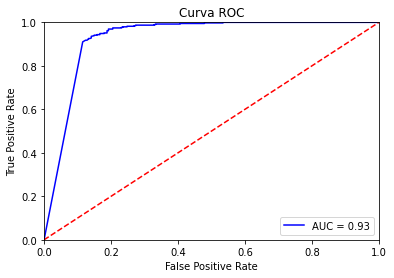

In [ ]:
# Predicción
import sklearn.metrics as metrics
preds, targs = learn_resnet50_.get_preds(dl=test_dataloader)

# Métricas de rendimiento

# De vector de probabilidades a etiqueta
preds_labels = []
for p in preds:
  if p[0] > p[1]:
    preds_labels.append(0)
  else:
    preds_labels.append(1)

# ACC, precision y recall
acc = metrics.accuracy_score(preds_labels, targs)
precision = metrics.precision_score(preds_labels, targs)
recall = metrics.recall_score(preds_labels, targs)
fpr, tpr, threshold = metrics.roc_curve(targs, preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('Métricas de test:')
print('\t- accuracy = ', round(float(acc), 4))
print('\t\t- precision = ', round(float(precision), 4))
print('\t\t- recall = ', round(float(recall), 4))
print('\t- AUC = ', round(float(roc_auc), 4))
print('')
# AUC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<center>

Modelo | ACC | AUC
-|-|-|
ResNet50 + ImageNet | 0.8654 | 0.9286 |

</center>

## 8.7 ResNet50 + Dropout

### Reproducibilidad

> Necesario fijado de semillas antes de su construcción para garantizar la reproducibilidad de los resultados.

In [ ]:
# Reproducibilidad
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available(): torch.cuda.manual_seed_all(1234)

### DataLoader

> Construcción del datablock.

In [ ]:
# DataLoader de entrenamiento
train_dataloader = DataBlock(
      blocks = (ImageBlock, CategoryBlock), # Tipo de input (imagen) y output (etiqueta categórica)
      get_items = get_image_files, # Devuelve una lista con todas las imagenes almacenadas en un directorio (y sus subdirectorios)
      splitter = RandomSplitter(valid_pct=0.1, seed=1234), # Reserva un 10% para validación (estratificado)
      get_y = parent_label, # Etiquetas definidas por el directorio en el que se encuentran ubicadas las imágenes (padre)
      item_tfms = Resize(224), # Se re-escalan las imágenes a 224, método de interpolación PIL.nearest
      batch_tfms = [IntToFloatTensor(), Normalize.from_stats(mean=[.5], std=[.5])], # Normalización de valores
    ).dataloaders(
        path_dir_datos + "/train", # Ruta de los datos
        seed=1234,
        bs=128, # "Batches" aleatorios a cada época
        shuffle = True # Tamaño de batch
        )

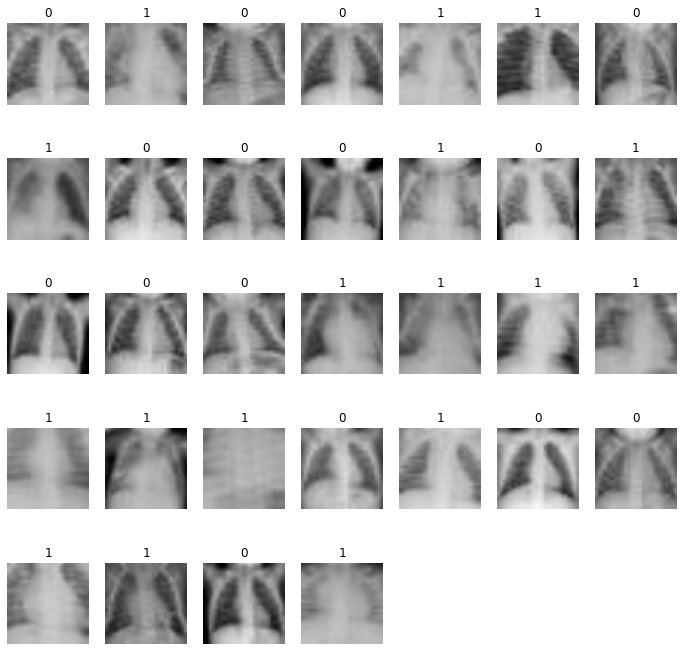

In [ ]:
# Comprobación dataloader
train_dataloader.show_batch(max_n=32, figsize=(12,12))

In [ ]:
# Comprobación dataloader
train_dataloader.train.show

<bound method Datasets.show of (#2429) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

In [ ]:
# Comprobación dataloader
train_dataloader.valid.show

<bound method Datasets.show of (#269) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]>

### Modelo

In [ ]:
# Cabecera
custom_head_resnet50_ = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(p=0.5),
    nn.Linear(100352 ,2)
    )

# Resto del modelo
learn_resnet50_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet50,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet50_
    )

# Visulaizar modelo
learn_resnet50_.summary()

Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                       

### Ajuste Fino

epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,2.695475,12.935142,0.554688,0.524164,1.000000,0.524164,0.475836,00:10
1,1.497522,6.797002,0.789284,0.576208,1.000000,0.552941,0.423792,00:09
2,0.998901,4.632618,0.885694,0.661710,0.985816,0.609649,0.338290,00:09
3,0.678927,0.789082,0.967115,0.899628,0.957447,0.865385,0.100372,00:09
4,0.463153,0.701122,0.973986,0.888476,0.957447,0.849057,0.111524,00:09


Better model found at epoch 0 with valid_loss value: 12.935141563415527.
Better model found at epoch 1 with valid_loss value: 6.797001838684082.
Better model found at epoch 2 with valid_loss value: 4.632618427276611.
Better model found at epoch 3 with valid_loss value: 0.7890824675559998.
Better model found at epoch 4 with valid_loss value: 0.7011223435401917.


epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.336395,0.582718,0.973349,0.907063,0.893617,0.926471,0.092937,00:27
1,0.223795,0.875552,0.972019,0.907063,0.907801,0.914286,0.092937,00:28
2,0.154092,0.555175,0.987201,0.933086,0.907801,0.962406,0.066914,00:27
3,0.102835,0.640627,0.981632,0.940520,0.964539,0.925170,0.059480,00:27
4,0.079072,0.614992,0.984929,0.933086,0.992908,0.891720,0.066914,00:27
5,0.055931,0.718167,0.974346,0.936803,0.950355,0.930556,0.063197,00:27
6,0.043223,0.669470,0.977283,0.933086,0.985816,0.896774,0.066914,00:27
7,0.035440,0.594918,0.988254,0.933086,0.929078,0.942446,0.066914,00:27


Better model found at epoch 0 with valid_loss value: 0.5827175974845886.
Better model found at epoch 2 with valid_loss value: 0.5551750063896179.
No improvement since epoch 2: early stopping


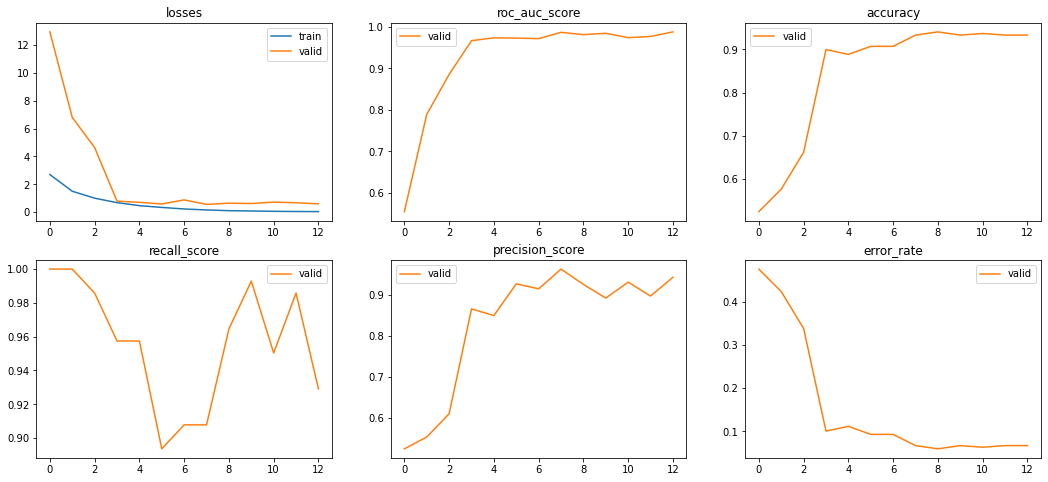

In [ ]:
# Ajuste fino MANUAL
lr = 0.001
tol = 0.01
patience = 5

learn_resnet50_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.resnet50,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
    custom_head=custom_head_resnet50_
    )


# Entrenamiento de la cabecera
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      )
    ]
# Congelar pesos
learn_resnet50_.freeze()
# Entrenar cabecera
learn_resnet50_.fit(n_epoch=5, lr=lr, cbs=cbs)
# Almacenar resultados
metrics = np.stack(learn_resnet50_.recorder.values)

# Entrenamiento de toda la red
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      ),
    EarlyStoppingCallback(
        monitor='valid_loss',
        min_delta=tol,
        patience=patience)
    ]
learn_resnet50_.unfreeze()
learn_resnet50_.fit(n_epoch=20, lr=lr/10, cbs=cbs)
# Almacenar resultados
metrics = np.vstack([metrics, learn_resnet50_.recorder.values])
names = learn_resnet50_.recorder.metric_names[1:-1]
# Gráficas
plot_metrics_vis(metrics=metrics, names=names)

### Resultados Validación

> - El mejor modelo (menor $L_{val}$) se encuentra para la época 2 de la segunda etapa del ajuste fino; es decir, octava época a nivel global.

<center>

Modelo | $\#E$ | $E_i$ | $L_{train}$ | $L_{val}$ | ACC | AUC
-|-|-|-|-|-|-
ResNet50 + Dropout | 13 | 8 | 0.154092 |	0.555175 |	0.933086 | 0.987201

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.
- $L_{train}$: Entropía cruzada media del conjunto de entranamiento.
- $L_{val}$: Entropía cruzada media del conjunto de validación.
- $ACC$: "Accuracy" para el conjunto de validación.
- $AUC$. Area bajo la curva ROC para el conjunto de validación.

### Test

In [ ]:
# DataLoader de test
test_dataloader = learn_resnet50_.dls.test_dl(files_test, with_labels=True)
# Comprobación
test_dataloader.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

Métricas de test:
	- accuracy =  0.8814
		- precision =  0.9436
		- recall =  0.8762
	- AUC =  0.9366



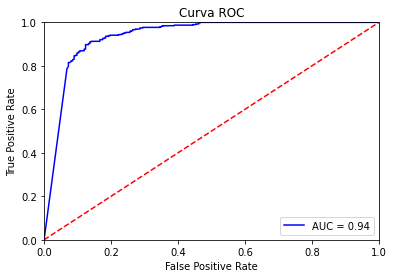

In [ ]:
# Predicción
import sklearn.metrics as metrics
preds, targs = learn_resnet50_.get_preds(dl=test_dataloader)

# Métricas de rendimiento

# De vector de probabilidades a etiqueta
preds_labels = []
for p in preds:
  if p[0] > p[1]:
    preds_labels.append(0)
  else:
    preds_labels.append(1)

# ACC, precision y recall
acc = metrics.accuracy_score(preds_labels, targs)
precision = metrics.precision_score(preds_labels, targs)
recall = metrics.recall_score(preds_labels, targs)
fpr, tpr, threshold = metrics.roc_curve(targs, preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('Métricas de test:')
print('\t- accuracy = ', round(float(acc), 4))
print('\t\t- precision = ', round(float(precision), 4))
print('\t\t- recall = ', round(float(recall), 4))
print('\t- AUC = ', round(float(roc_auc), 4))
print('')
# AUC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<center>

Modelo | ACC | AUC
-|-|-|
ResNet50 + ImageNet + Dropout | 0.8814 | 0.9366 |

</center>

## 8.8 AlexNet

### Reproducibilidad

> Necesario fijado de semillas antes de su construcción para garantizar la reproducibilidad de los resultados.

In [ ]:
# Reproducibilidad
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available(): torch.cuda.manual_seed_all(1234)

### DataLoader

> Construcción del datablock.

In [ ]:
# DataLoader de entrenamiento
train_dataloader = DataBlock(
      blocks = (ImageBlock, CategoryBlock), # Tipo de input (imagen) y output (etiqueta categórica)
      get_items = get_image_files, # Devuelve una lista con todas las imagenes almacenadas en un directorio (y sus subdirectorios)
      splitter = RandomSplitter(valid_pct=0.1, seed=1234), # Reserva un 10% para validación (estratificado)
      get_y = parent_label, # Etiquetas definidas por el directorio en el que se encuentran ubicadas las imágenes (padre)
      item_tfms = Resize(224), # Se re-escalan las imágenes a 224, método de interpolación PIL.nearest
      batch_tfms = [IntToFloatTensor(), Normalize.from_stats(mean=[.5], std=[.5])], # Normalización de valores
    ).dataloaders(
        path_dir_datos + "/train", # Ruta de los datos
        seed=1234,
        bs=128, # "Batches" aleatorios a cada época
        shuffle = True # Tamaño de batch
        )

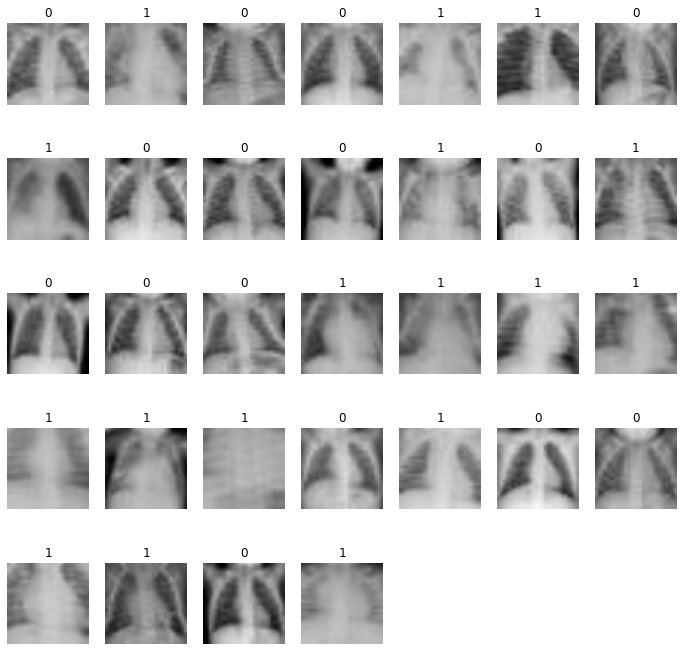

In [ ]:
# Comprobación dataloader
train_dataloader.show_batch(max_n=32, figsize=(12,12))

In [ ]:
# Comprobación dataloader
train_dataloader.train.show

<bound method Datasets.show of (#2429) [(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

In [ ]:
# Comprobación dataloader
train_dataloader.valid.show

<bound method Datasets.show of (#269) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(0)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(0))...]>

### Modelo

In [ ]:
# Modelo
learn_alexnet_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.alexnet,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
)

# Visulaizar modelo
learn_alexnet_.summary()

Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 55 x 55  
Conv2d                                    23296      False     
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 27 x 27  
MaxPool2d                                                      
____________________________________________________________________________
                     128 x 192 x 27 x 27 
Conv2d                                    307392     False     
ReLU                                                           
____________________________________________________________________________
                     128 x 192 x 13 x 13 
MaxPool2d                                                      
____________________________________________________________________________
                     128 x 384

### Ajuste Fino

epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.436015,0.265605,0.959331,0.892193,0.879433,0.911765,0.107807,00:05
1,0.294894,0.197539,0.977837,0.903346,0.893617,0.919708,0.096654,00:05
2,0.237746,0.183478,0.983322,0.918216,0.879433,0.961240,0.081784,00:05
3,0.200915,0.181215,0.984320,0.921933,0.907801,0.941176,0.078067,00:05
4,0.173765,0.208909,0.980607,0.925651,0.929078,0.929078,0.074349,00:05


Better model found at epoch 0 with valid_loss value: 0.26560524106025696.
Better model found at epoch 1 with valid_loss value: 0.19753873348236084.
Better model found at epoch 2 with valid_loss value: 0.18347769975662231.
Better model found at epoch 3 with valid_loss value: 0.18121491372585297.


epoch,train_loss,valid_loss,roc_auc_score,accuracy,recall_score,precision_score,error_rate,time
0,0.155765,0.279028,0.977504,0.892193,0.950355,0.858974,0.107807,00:06
1,0.146368,0.220097,0.982214,0.940520,0.921986,0.962963,0.059480,00:07
2,0.115831,0.192340,0.986037,0.933086,0.964539,0.912752,0.066914,00:06
3,0.103327,0.239649,0.981383,0.933086,0.900709,0.969466,0.066914,00:06
4,0.092418,0.226754,0.984043,0.918216,0.964539,0.888889,0.081784,00:06
5,0.081485,0.176240,0.987035,0.944238,0.978723,0.920000,0.055762,00:06
6,0.070418,0.187263,0.987090,0.947955,0.964539,0.937931,0.052045,00:06
7,0.062269,0.234488,0.986813,0.947955,0.943262,0.956835,0.052045,00:06
8,0.062170,0.240850,0.987533,0.933086,0.907801,0.962406,0.066914,00:06
9,0.057801,0.120499,0.993240,0.959108,0.957447,0.964286,0.040892,00:06


Better model found at epoch 0 with valid_loss value: 0.27902817726135254.
Better model found at epoch 1 with valid_loss value: 0.22009655833244324.
Better model found at epoch 2 with valid_loss value: 0.19233955442905426.
Better model found at epoch 5 with valid_loss value: 0.17623992264270782.
Better model found at epoch 9 with valid_loss value: 0.12049917876720428.
No improvement since epoch 9: early stopping


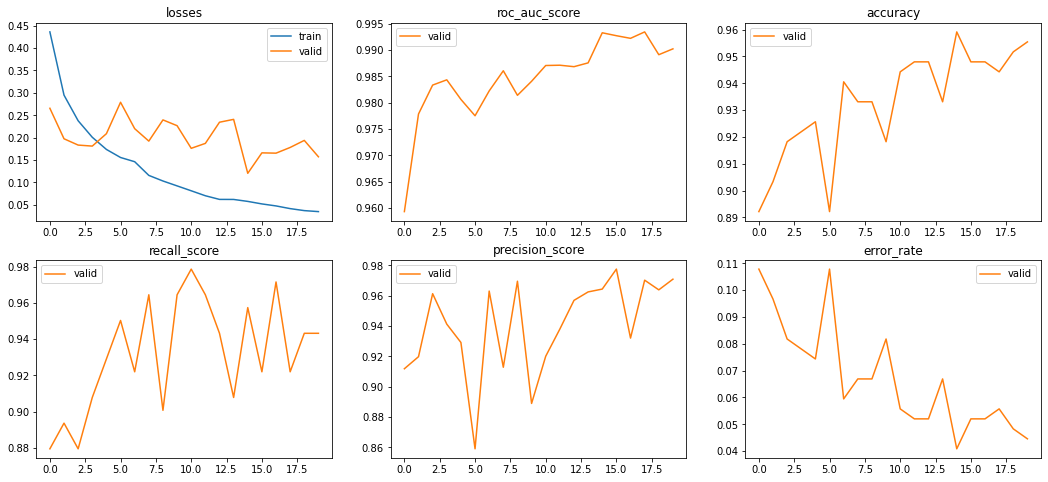

In [ ]:
# Ajuste fino MANUAL
lr = 0.001
tol = 0.01
patience = 5

learn_alexnet_ = vision_learner(
    dls = train_dataloader,
    arch = fastai.vision.models.alexnet,
    metrics=[RocAucBinary(), accuracy, Recall(), Precision(), error_rate],
    pretrained=True,
    train_bn=False,
)


# Entrenamiento de la cabecera
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      )
    ]
# Congelar pesos
learn_alexnet_.freeze()
# Entrenar cabecera
learn_alexnet_.fit(n_epoch=5, lr=lr, cbs=cbs)
# Almacenar resultados
metrics = np.stack(learn_alexnet_.recorder.values)

# Entrenamiento de toda la red
cbs=[
    SaveModelCallback(
                        monitor='valid_loss',
                        min_delta=0.0,
                        fname='model',
                      ),
    EarlyStoppingCallback(
        monitor='valid_loss',
        min_delta=tol,
        patience=patience)
    ]
learn_alexnet_.unfreeze()
learn_alexnet_.fit(n_epoch=20, lr=lr/10, cbs=cbs)
# Almacenar resultados
metrics = np.vstack([metrics, learn_alexnet_.recorder.values])
names = learn_alexnet_.recorder.metric_names[1:-1]
# Gráficas
plot_metrics_vis(metrics=metrics, names=names)

### Resultados Validación

> - El mejor modelo (menor $L_{val}$) se encuentra para la época 9 de la segunda etapa del ajuste fino; es decir, décimo quinta época a nivel global.

<center>

Modelo | $\#E$ | $E_i$ | $L_{train}$ | $L_{val}$ | ACC | AUC
-|-|-|-|-|-|-
AlexNet | 20 | 15 | 0.057801 |	0.120499 |	0.959108 | 0.993240

</center>

- $E_i$: Época en la que fue encontrado.
- $\#E$: Número de épocas ejecutadas.
- $L_{train}$: Entropía cruzada media del conjunto de entranamiento.
- $L_{val}$: Entropía cruzada media del conjunto de validación.
- $ACC$: "Accuracy" para el conjunto de validación.
- $AUC$. Area bajo la curva ROC para el conjunto de validación.

### Test

In [ ]:
# DataLoader de test
test_dataloader = learn_alexnet_.dls.test_dl(files_test, with_labels=True)
# Comprobación
test_dataloader.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1)),(PILImage mode=RGB size=28x28, TensorCategory(1))...]>

Métricas de test:
	- accuracy =  0.8926
		- precision =  0.9846
		- recall =  0.8629
	- AUC =  0.9678



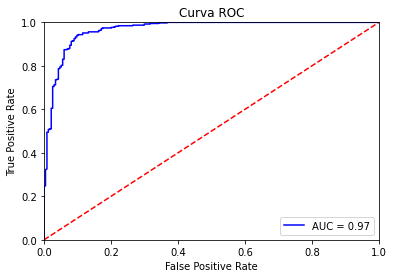

In [ ]:
# Predicción
import sklearn.metrics as metrics
preds, targs = learn_alexnet_.get_preds(dl=test_dataloader)

# Métricas de rendimiento

# De vector de probabilidades a etiqueta
preds_labels = []
for p in preds:
  if p[0] > p[1]:
    preds_labels.append(0)
  else:
    preds_labels.append(1)

# ACC, precision y recall
acc = metrics.accuracy_score(preds_labels, targs)
precision = metrics.precision_score(preds_labels, targs)
recall = metrics.recall_score(preds_labels, targs)
fpr, tpr, threshold = metrics.roc_curve(targs, preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('Métricas de test:')
print('\t- accuracy = ', round(float(acc), 4))
print('\t\t- precision = ', round(float(precision), 4))
print('\t\t- recall = ', round(float(recall), 4))
print('\t- AUC = ', round(float(roc_auc), 4))
print('')
# AUC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<center>

Modelo | ACC | AUC
-|-|-|
AlexNet + ImageNet | 0.8926 | 0.9678 |

</center>

# 9 . Bibliografía

[1] Kermany, D. S. et al. Identifying medical diagnoses and treatable diseases by image-based deep learning. Cell 172, 1122 –
1131.e9, https://doi.org/10.1016/j.cell.2018.02.010 (2018).

[2] Mesejo, P.; Martos, R.; Ibáñez, Ó.; Novo, J.; Ortega, M. A Survey on Artificial Intelligence Techniques for Biomedical Image Analysis in Skeleton-Based Forensic Human Identification. Appl. Sci. 2020, 10, 4703. https://doi.org/10.3390/app10144703

[3] Esteva, A.; Kuprel, B.; Novoa, R.A.; Ko, J.; Swetter, S.M.; Blau, H.M.; Thrun, S. Dermatologist-level
classification of skin cancer with deep neural networks. Nature 2017, 542, 115–118. https://www.nature.com/articles/nature21056


[4] Mesejo, P.; Pizarro, D.; Abergel, A.; Rouquette, O.; Beorchia, S.; Poincloux, L.; Bartoli, A. Computer-aided
classification of gastrointestinal lesions in regular colonoscopy. IEEE Trans. Med. Imaging 2016, 35, 2051–2063. https://ieeexplore.ieee.org/document/7442848/ https://pubmed.ncbi.nlm.nih.gov/28005009/


[5] Kooi, T.; Litjens, G.; Van Ginneken, B.; Gubern-Mérida, A.; Sánchez, C.I.; Mann, R.; den Heeten, A.;
Karssemeijer, N. Large scale deep learning for computer aided detection of mammographic lesions.
Med. Image Anal. 2017, 35, 303–312. https://pubmed.ncbi.nlm.nih.gov/27497072/ https://www.sciencedirect.com/science/article/pii/S1361841516301244?via%3Dihub

[6] Jiancheng Yang, Rui Shi, Donglai Wei, Zequan Liu, Lin Zhao, Bilian Ke, Hanspeter Pfister, Bingbing Ni. "MedMNIST v2: A Large-Scale Lightweight Benchmark for 2D and 3D Biomedical Image Classification". arXiv preprint arXiv:2110.14795, 2021. https://arxiv.org/pdf/2110.14795.pdf

[7] He, K., Zhang, X., Ren, S. & Sun, J. Deep residual learning for image recognition. In Conference on Computer Vision and
Pattern Recognition, 770–778 (2016).


[8] Feurer, M. et al. Auto-sklearn: efficient and robust automated machine learning. In Automated Machine Learning, 113–134
(Springer, Cham, 2019).


[9] Jin, H., Song, Q. & Hu, X. Auto-keras: An efficient neural architecture search system. In Conference on Knowledge
Discovery and Data Mining, 1946–1956 (ACM, 2019).

[10] https://cloud.google.com/vision/automl/docs

[11] https://pytorch.org/vision/stable/models.html

[12] https://forums.fast.ai/t/understanding-fine-tuning/54142/5

[13] https://pytorch.org/docs/stable/generated/torch.optim.Adam.html